In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# pd.set_option('display.max_rows', 5572 )
# pd.set_option("display.max_columns", 6300)

In [3]:
data=pd.read_csv("spam.csv", encoding = "latin-1")

In [4]:
data=data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [5]:
data.columns=["Target","Mail"]
data=data[["Mail","Target"]]

In [6]:
data["len"]=data["Mail"].apply(len)

In [7]:
data["Target"]=data["Target"].map({"ham":0,"spam":1})

In [8]:
data

,Mail,Target,len
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161
5568,Will Ì_ b going to esplanade fr home?,0,37
5569,"Pity, * was in mood for that. So...any other s...",0,57
5570,The guy did some bitching but I acted like i'd...,0,125


### DISTPLOT ACROSS HAM AND SPAM BASED ON LENGTH OF MESSAGE

Text(0.5, 0, 'length of Message')

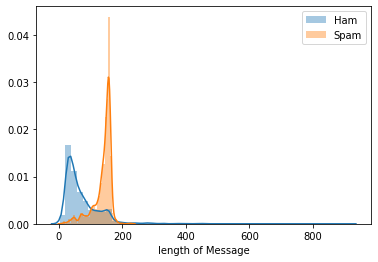

In [9]:
import seaborn as sns

sns.distplot(data["len"][data["Target"]==0])
sns.distplot(data["len"][data["Target"]==1])
plt.legend(["Ham", "Spam"])
plt.xlabel("length of Message")


### OUTLIER REMOVAL

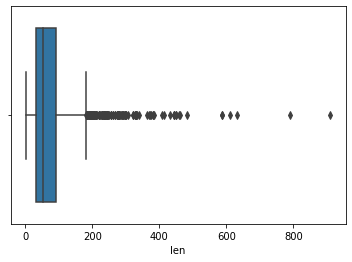

In [10]:
sns.boxplot(data["len"][data["Target"]==0],orient="h")
plt.show()

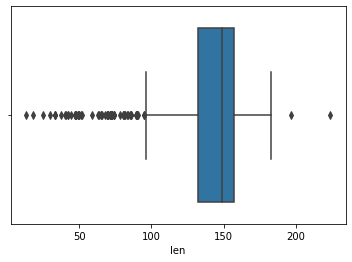

In [11]:
sns.boxplot(data["len"][data["Target"]==1],orient="h")
plt.show()

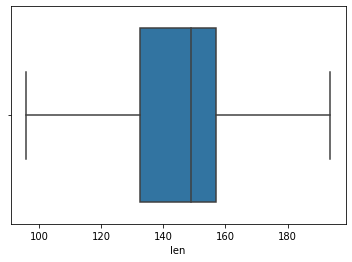

In [12]:
descr=data["len"][data["Target"]==1].describe()
IQR=descr["75%"]-descr["25%"]
upper=descr["75%"]+1.5*IQR
lower=descr["25%"]-1.5*IQR
up=data["len"][data["Target"]==1][data["len"]>upper].index
data.loc[up,["len"]]=upper
low=data["len"][data["Target"]==1][data["len"]<lower].index
data.loc[low,["len"]]=lower
sns.boxplot(data["len"][data["Target"]==1],orient="h")
plt.show()

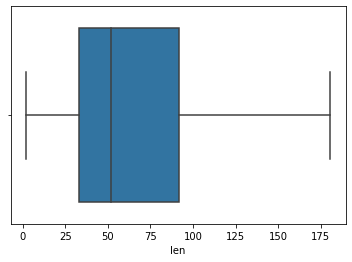

In [13]:
descr=data["len"][data["Target"]==0].describe()
IQR=descr["75%"]-descr["25%"]
upper=descr["75%"]+1.5*IQR
lower=descr["25%"]-1.5*IQR
up=data["len"][data["Target"]==0][data["len"]>upper].index
data.loc[up,["len"]]=upper
low=data["len"][data["Target"]==0][data["len"]<lower].index
data.loc[low,["len"]]=lower
sns.boxplot(data["len"][data["Target"]==0],orient="h")
plt.show()

In [15]:
data["Target"].value_counts()

0    4825
1     747
Name: Target, dtype: int64

### HAM AND SPAM

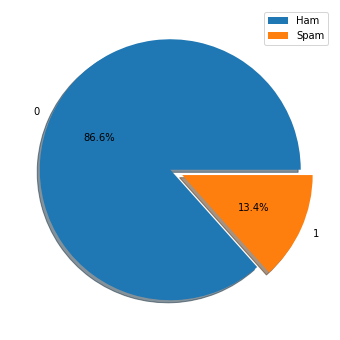

In [16]:
data["Target"].value_counts()
data["Target"].value_counts().plot(kind="pie",explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.legend(["Ham", "Spam"])
plt.ylabel("Spam vs Ham")
plt.axis("off"); 

### NLP

### DOWNLOADING ESSENTIAL DATASET OF NLTK

In [17]:
import nltk
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\J\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\J\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\J\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### REMOVAL OF HYPERLINKS

In [18]:
# import re
# mail=mail.apply(lambda x:re.sub(r"http\S+", "", x))
# mail

In [19]:
mail=data["Mail"]

### TOKENIZATION

In [20]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
mail=mail.apply(lambda x:tk.tokenize(x)).apply(lambda x: " ".join(x))
mail

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ì_ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: Mail, Length: 5572, dtype: object

### REMOVING PUNCTUATIONS

In [21]:
mail=mail.str.replace("[^a-zA-Z]"," ")
mail

0       Go until jurong point   crazy    Available onl...
1                         Ok lar     Joking wif u oni    
2       Free entry in   a wkly comp to win FA Cup fina...
3       U dun say so early hor     U c already then sa...
4       Nah I don t think he goes to usf   he lives ar...
                              ...                        
5567    This is the  nd time we have tried   contact u...
5568               Will    b going to esplanade fr home  
5569    Pity     was in mood for that   So     any oth...
5570    The guy did some bitching but I acted like i d...
5571                          Rofl   Its true to its name
Name: Mail, Length: 5572, dtype: object

In [22]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
mail=mail.apply(lambda x:tokenizer.tokenize(x)).apply(lambda x: " ".join(x))
mail

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in a wkly comp to win FA Cup final ...
3             U dun say so early hor U c already then say
4       Nah I don t think he goes to usf he lives arou...
                              ...                        
5567    This is the nd time we have tried contact u U ...
5568                    Will b going to esplanade fr home
5569    Pity was in mood for that So any other suggest...
5570    The guy did some bitching but I acted like i d...
5571                            Rofl Its true to its name
Name: Mail, Length: 5572, dtype: object

### REMOVING STOP WORDS

In [23]:
from nltk.corpus import stopwords
from nltk import word_tokenize
stop=stopwords.words("english")
mail=mail.apply(lambda x: [w for w in word_tokenize(x) if w not in stop]).apply(lambda x:" ".join(x))
mail

0       Go jurong point crazy Available bugis n great ...
1                                 Ok lar Joking wif u oni
2       Free entry wkly comp win FA Cup final tkts st ...
3                     U dun say early hor U c already say
4                Nah I think goes usf lives around though
                              ...                        
5567    This nd time tried contact u U Pound prize cla...
5568                       Will b going esplanade fr home
5569                             Pity mood So suggestions
5570    The guy bitching I acted like interested buyin...
5571                                   Rofl Its true name
Name: Mail, Length: 5572, dtype: object

### STEMMING

In [4]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer("english")
mail=mail.apply(lambda x: [stemmer.stem(i.lower()) for i in tk.tokenize(x) ]).apply(lambda x:" ".join(x))

NameError: name 'mail' is not defined

In [25]:
stemmer.stem('only')

'onli'

In [26]:
mail

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkts st ...
3                     u dun say earli hor u c alreadi say
4                  nah i think goe usf live around though
                              ...                        
5567    this nd time tri contact u u pound prize claim...
5568                           will b go esplanad fr home
5569                                 piti mood so suggest
5570    the guy bitch i act like interest buy someth e...
5571                                    rofl it true name
Name: Mail, Length: 5572, dtype: object

### REMOVE WHITESPACES

In [27]:
mail=mail.apply(lambda x: x.strip())
mail

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkts st ...
3                     u dun say earli hor u c alreadi say
4                  nah i think goe usf live around though
                              ...                        
5567    this nd time tri contact u u pound prize claim...
5568                           will b go esplanad fr home
5569                                 piti mood so suggest
5570    the guy bitch i act like interest buy someth e...
5571                                    rofl it true name
Name: Mail, Length: 5572, dtype: object

### REMOVE NEWLINE

In [28]:
mail=mail.apply(lambda x: x.replace('\n',''))
mail

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkts st ...
3                     u dun say earli hor u c alreadi say
4                  nah i think goe usf live around though
                              ...                        
5567    this nd time tri contact u u pound prize claim...
5568                           will b go esplanad fr home
5569                                 piti mood so suggest
5570    the guy bitch i act like interest buy someth e...
5571                                    rofl it true name
Name: Mail, Length: 5572, dtype: object

In [29]:
mail[4]

'nah i think goe usf live around though'

In [30]:
mail=mail.apply(lambda x: x.lstrip('\t'))
mail

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkts st ...
3                     u dun say earli hor u c alreadi say
4                  nah i think goe usf live around though
                              ...                        
5567    this nd time tri contact u u pound prize claim...
5568                           will b go esplanad fr home
5569                                 piti mood so suggest
5570    the guy bitch i act like interest buy someth e...
5571                                    rofl it true name
Name: Mail, Length: 5572, dtype: object

In [31]:
data["Mail"]=mail

In [32]:
data.head()

,Mail,Target,len
0,go jurong point crazi avail bugi n great world...,0,111.0
1,ok lar joke wif u oni,0,29.0
2,free entri wkli comp win fa cup final tkts st ...,1,155.0
3,u dun say earli hor u c alreadi say,0,49.0
4,nah i think goe usf live around though,0,61.0


In [33]:
data["Target"].value_counts()

0    4825
1     747
Name: Target, dtype: int64

### WORD CLOUD

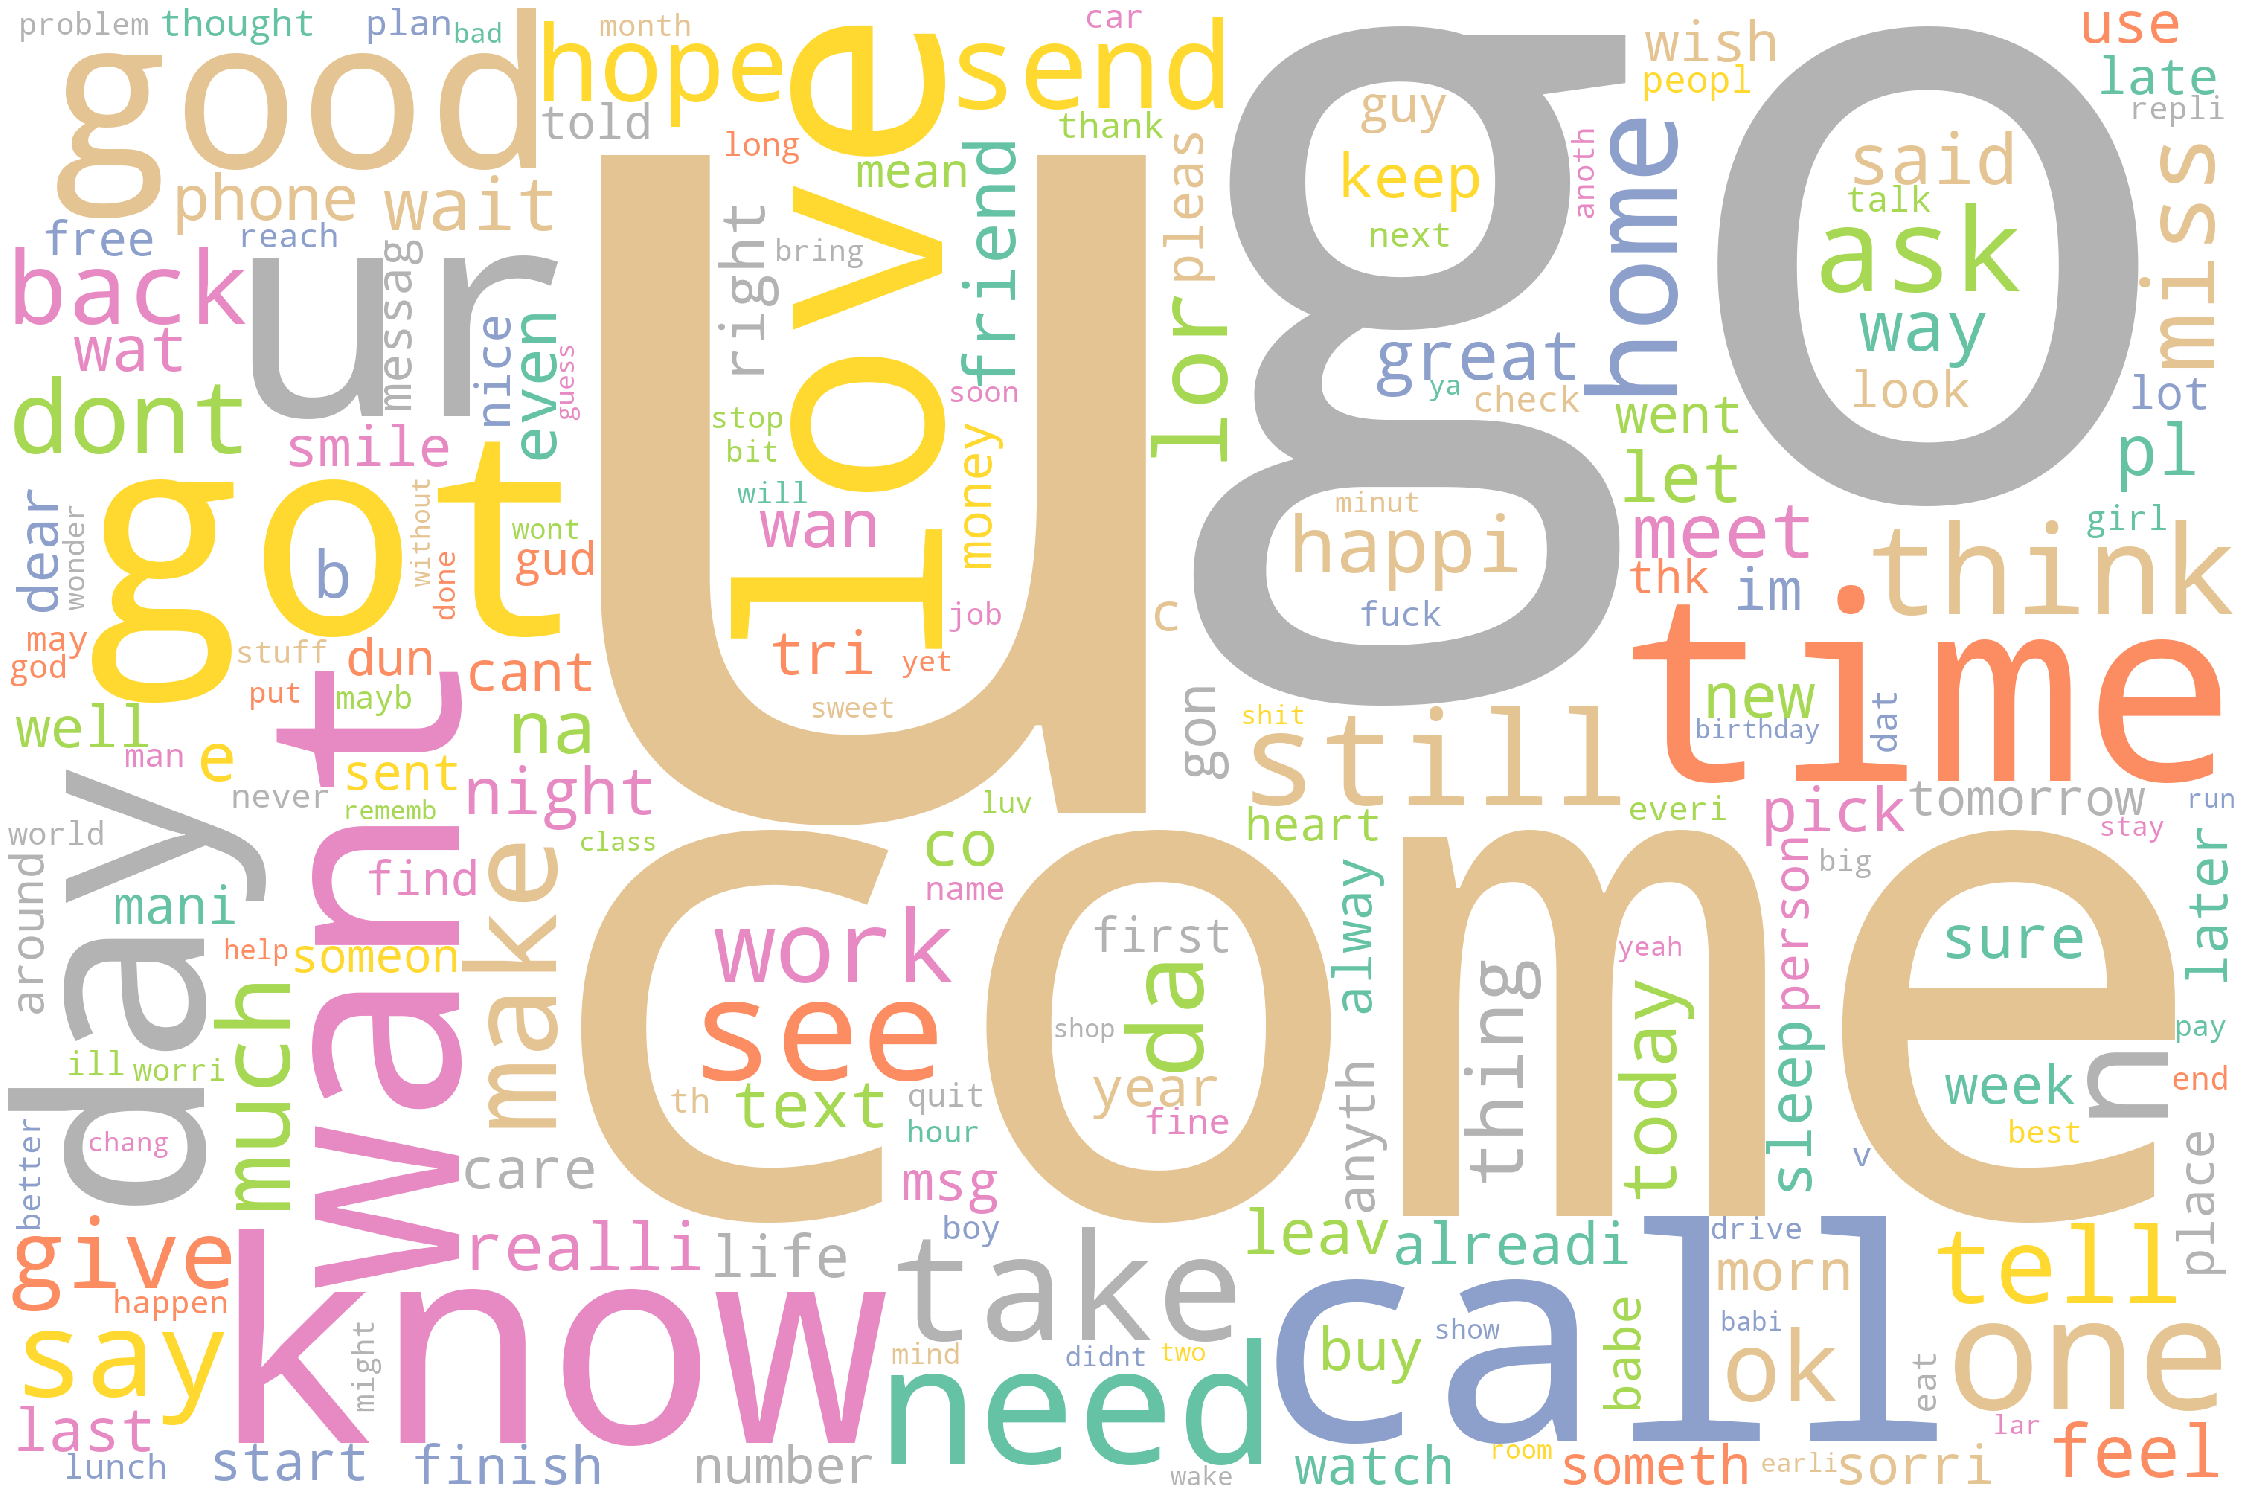

In [34]:
text=""
for i in data["Mail"][data["Target"]==0]:
    i=str(i).lower()
    text+=i
    
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white',
                      colormap='Set2', collocations=False,stopwords = STOPWORDS).generate(text)
# Plot

plt.figure(figsize=(40, 30))
    # Display image
plt.imshow(wordcloud) 
    # No axis details
plt.axis("off"); 

In [35]:
text=text.split(" ")
text

print("Top 10 Ham words are :\n")
pd.Series(text).value_counts().head(n = 10)

Top 10 Ham words are :



i       1405
u        919
go       392
get      330
come     250
call     243
ur       241
got      224
know     222
like     220
dtype: int64

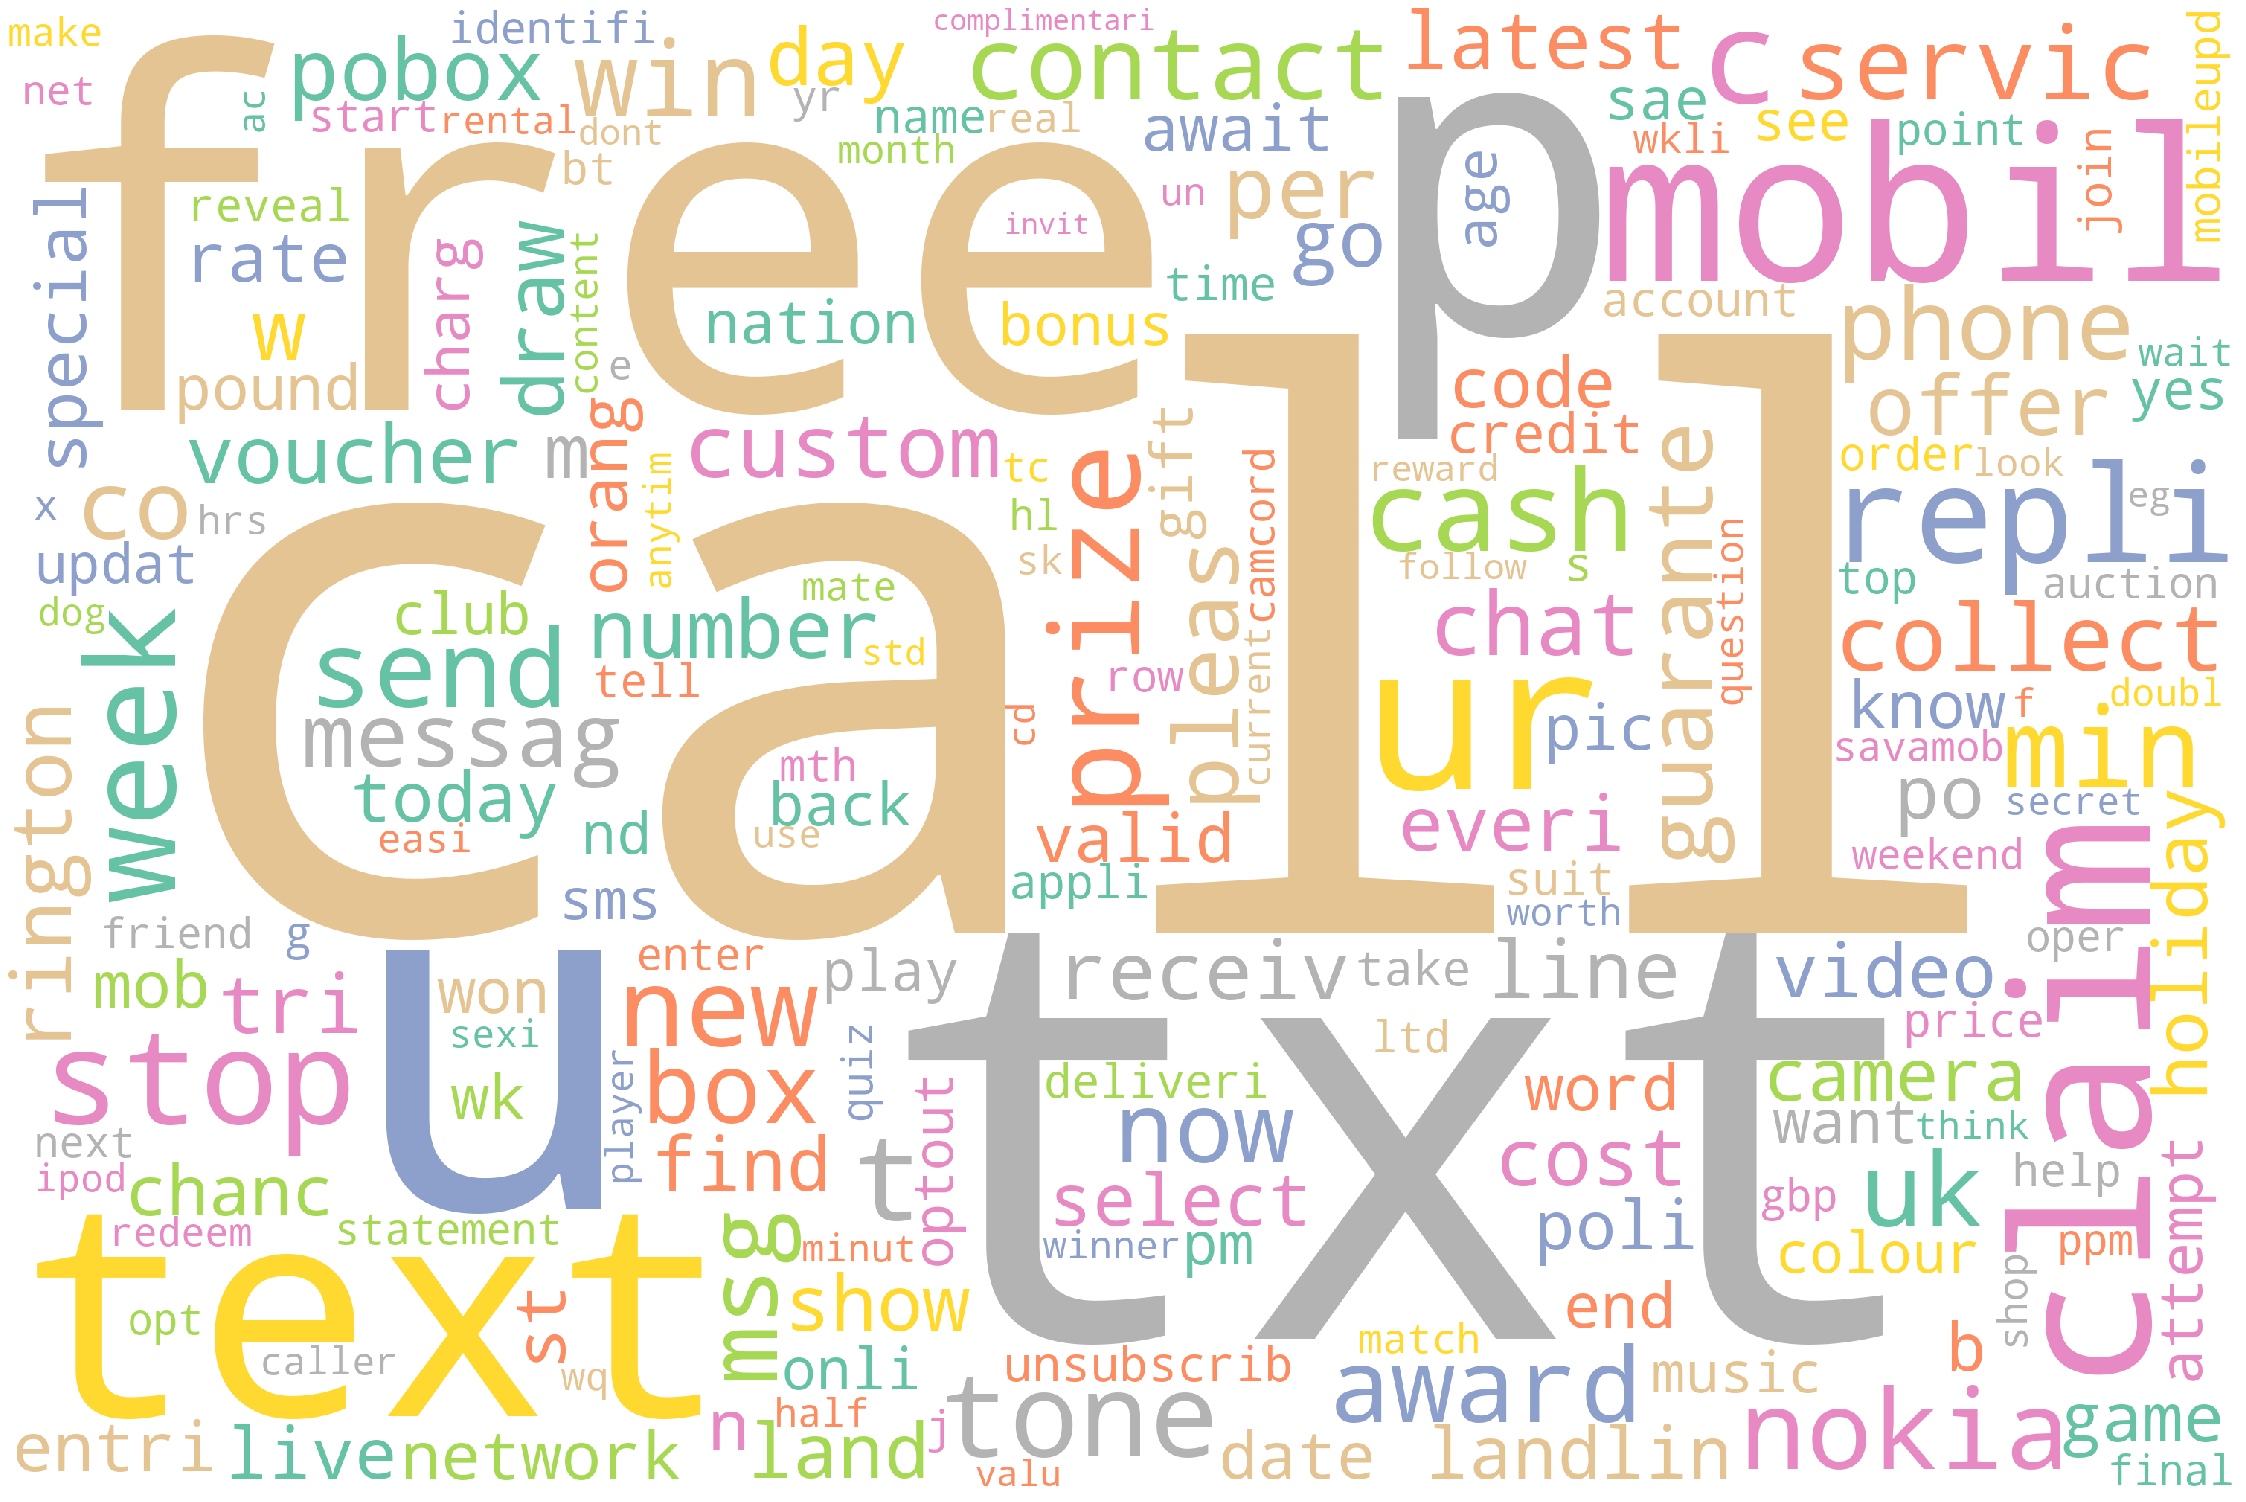

In [36]:
text=""
for i in data["Mail"][data["Target"]==1]:
    i=str(i).lower()
    text+=i
    
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white',
                      colormap='Set2', collocations=False,stopwords = STOPWORDS).generate(text)
# Plot

plt.figure(figsize=(40, 30))
    # Display image
plt.imshow(wordcloud) 
    # No axis details
plt.axis("off");

In [37]:
text=text.split(" ")
text

print("Top 10 Spam words are :\n")
pd.Series(text).value_counts().head(n = 10)

Top 10 Spam words are :



call     343
free     176
txt      167
u        162
p        141
text     139
mobil    139
ur       129
claim    112
repli    109
dtype: int64

### TFIDF VECTORIZATION

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer("english")
data_vec=vec.fit_transform(mail)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=english as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [39]:
data_vec.shape
# df=pd.Series(data_vec[1,:])
             
             
# df

(5572, 6301)

In [70]:
data_vec

<5572x6301 sparse matrix of type '<class 'numpy.float64'>'
	with 48809 stored elements in Compressed Sparse Row format>

### SPARSE matrix TO MATRIX

In [40]:
matrix=data_vec.todense()
matrix

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
df=pd.DataFrame(matrix)

In [43]:
matrix.shape[0]

5572

In [44]:
words=vec.get_feature_names()
words

['aa',
 'aah',
 'aaniy',
 'aaooooright',
 'aathi',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'abel',
 'aberdeen',
 'abi',
 'abil',
 'abiola',
 'abj',
 'abl',
 'abnorm',
 'about',
 'abouta',
 'abroad',
 'absenc',
 'absolut',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abus',
 'ac',
 'academ',
 'acc',
 'accent',
 'accentur',
 'accept',
 'access',
 'accid',
 'accident',
 'accommod',
 'accommodationvouch',
 'accomod',
 'accord',
 'accordin',
 'account',
 'accumul',
 'ach',
 'achan',
 'achiev',
 'acid',
 'acknowledg',
 'acl',
 'acnt',
 'aco',
 'across',
 'act',
 'actin',
 'action',
 'activ',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'addi',
 'addict',
 'address',
 'adewal',
 'adi',
 'adjust',
 'admin',
 'administr',
 'admir',
 'admiss',
 'admit',
 'ador',
 'adp',
 'adress',
 'adrian',
 'adsens',
 'adult',
 'advanc',
 'adventur',
 'advic',
 'advis',
 'advisor',
 'ae',
 'aeronaut',
 'aeroplan',
 'afew',
 'affair',
 'affect',
 'affection',
 'affidavit',
 'afford',
 'afghanistan',
 

In [45]:
len(words)


6301

In [46]:
df["len"]=data["len"]

In [47]:
# x=[[data_vec,data["len"]]]

In [48]:
y=data["Target"]

### SPLITTING TEST TRAIN 

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2,stratify=y,random_state=42)

In [50]:
#Oversampling the train_set to overcome imbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

### LOGISTIC REGRESSION

In [51]:
from sklearn.linear_model import LogisticRegression
model_logistic=LogisticRegression()
model_logistic.fit(X_res, y_res)
ypred_log=model_logistic.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
from sklearn.metrics import accuracy_score
logistic_score=accuracy_score(y_test,ypred_log)
logistic_score

0.9811659192825112

### RANDOM FOREST

In [53]:
from sklearn.ensemble import RandomForestClassifier
model_forest=RandomForestClassifier(random_state=0)
model_forest.fit(X_res, y_res)
ypred=model_forest.predict(X_test)

In [54]:
forest_score=accuracy_score(y_test,ypred)
forest_score

0.989237668161435

### XG BOOST

In [55]:
import xgboost as xbg
model_xgboost=xbg.XGBClassifier()
model_xgboost.fit(X_res, y_res)
ypred=model_xgboost.predict(X_test)

In [56]:
xgboost_score=accuracy_score(y_test,ypred)
xgboost_score

0.989237668161435

### KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
a=[]
for i in range(1,21):
    model_neignbors=KNeighborsClassifier(n_neighbors=i)
    model_neignbors.fit(X_res, y_res)
    ypred=model_neignbors.predict(X_test)
    a.append(model_neignbors.score(X_test,y_test).round(2))


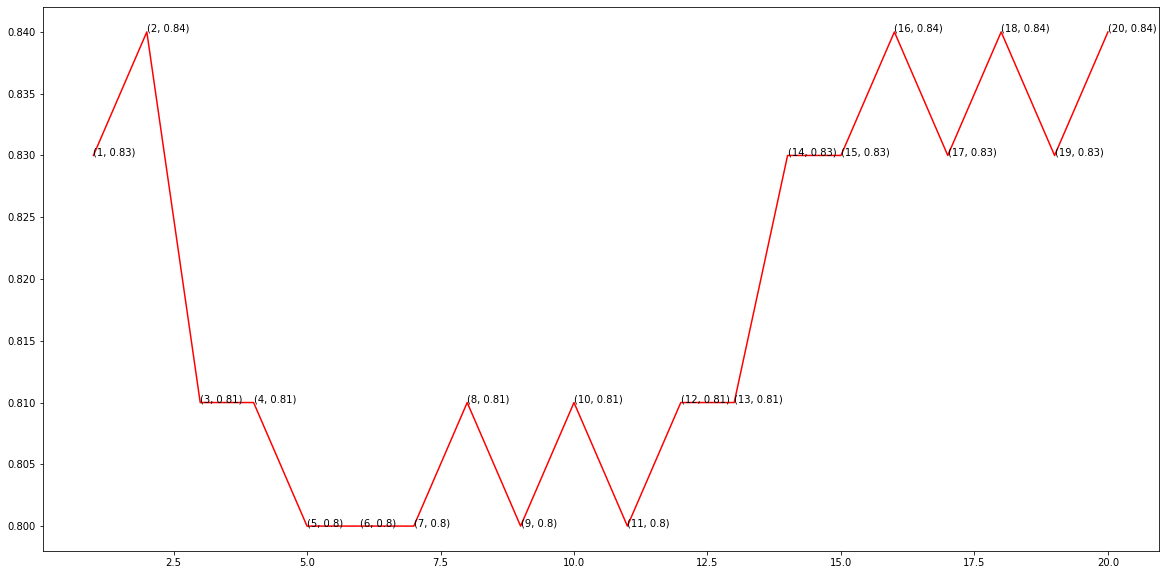

In [72]:
b=[x for x in range(1,21)]
ds=pd.Series(data=a,index=b).sort_values(ascending=False)
plt.figure(figsize=(20,10))
plt.plot(b, a, color = 'red')
for i in range(len(a)):
    plt.text(b[i],a[i],(b[i],a[i]))


### NAIVE BAYES

In [59]:
from sklearn.naive_bayes import MultinomialNB
gaussianNb = MultinomialNB()
gaussianNb.fit(X_res, y_res)
ypred = gaussianNb.predict(X_test)

In [60]:
Bayes_score=accuracy_score(y_test,ypred)
Bayes_score

0.957847533632287

In [61]:
df=pd.Series(data=[logistic_score,forest_score,xgboost_score,Bayes_score],index=["logistic_score","forest_score","xgboost_score","Bayes_score"]).sort_values(ascending=False)
df=df*100
df

xgboost_score     98.923767
forest_score      98.923767
logistic_score    98.116592
Bayes_score       95.784753
dtype: float64

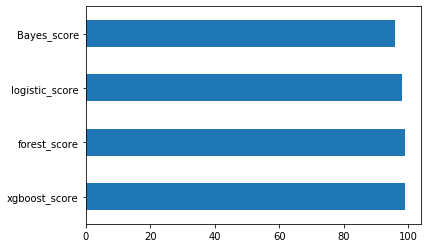

In [62]:
    df.plot(kind="barh")

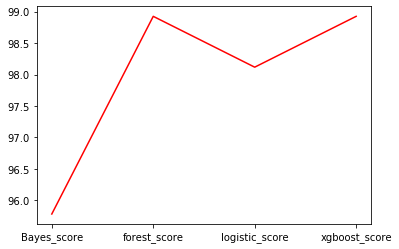

In [63]:
import seaborn as sns
sns.lineplot(df.index,df,color = 'red')


### HYPERPARAMS RANDOM FOREST

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model=RandomForestClassifier()
n_estimators=[25,30,50,75,100]
criterion=["entropy","gini"]
max_depth=[3,5,7,10]
parameters={"n_estimators":n_estimators,"criterion":criterion,"max_depth":max_depth}
model_class=GridSearchCV(model,parameters)
model_class.fit(X_res, y_res)
model_class.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}

In [65]:
model_class=RandomForestClassifier(criterion= 'gini', max_depth=10, n_estimators=100)
model_class.fit(X_res, y_res)
ypred_rad_hyper=model_class.predict(X_test)

In [66]:
forest_hyper_score=accuracy_score(y_test,ypred_rad_hyper)
forest_score

0.989237668161435

### HYPERPARAMS XGBOOST

In [67]:
parameters={'objective':['binary:logistic'],'colsample_bytree':[0.3],'learning_rate':[0.1],
           'max_depth':[3,5],'alpha':[10],'n_estimators':[10,50,100]}
xgb_class=GridSearchCV(model_xgboost,parameters)
xgb_class.fit(X_res, y_res)
xgb_class.best_params_

{'alpha': 10,
 'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'objective': 'binary:logistic'}

In [68]:
xgb_class=xbg.XGBClassifier(alpha=10,
 colsample_bytree=0.3,
 learning_rate=0.1,
 max_depth=5,
 n_estimators=100,
 objective='binary:logistic')
xgb_class.fit(X_res, y_res)
ypred_xg_hyper=xgb_class.predict(X_test)

In [69]:
xgboost_hyper_score=accuracy_score(y_test,ypred_xg_hyper)
xgboost_score

0.989237668161435